In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_c = pd.read_csv("train/customers.csv", delimiter=";")
df_i = pd.read_csv("train/indicators.csv", delimiter=";")

print(f"Same size ? >> {len(df_c)==len(df_i)}")
print(f"Same amount of unique client id ? >> {len(df_c['ID_CLIENT'].unique()) == len(df_i['ID_CLIENT'].unique())}")
print(f"Only unique ID ? >> {len(df_c)==len(df_c['ID_CLIENT'].unique())}")

FileNotFoundError: [Errno 2] No such file or directory: 'train/customers.csv'

In [3]:
df = df_c.merge(df_i,on="ID_CLIENT")
df["DATE_ENTREE"]=pd.to_datetime(df["DATE_ENTREE"]) 
df

ID_CLIENT DATE_ENTREE               NOM       PAYS SEXE  AGE  \
0      15688172  2015-01-01               Tai    Espagne    H   40   
1      15787258  2014-05-01              Ross    Espagne    F   29   
2      15791700  2018-01-01  Ugochukwutubelum  Allemagne    H   47   
3      15569438  2010-03-01               Mai  Allemagne    H   36   
4      15778947  2017-01-01          Sullivan     France    H   36   
...         ...         ...               ...        ...  ...  ...   
9945   15711457  2013-01-01              Herz     France    F   28   
9946   15712403  2019-05-01          McMillan     France    F   61   
9947   15576263  2015-04-01          Clements     France    F   22   
9948   15745843  2016-02-01            Kinlaw    Espagne    F   31   
9949   15753229  2011-04-01          Genovese     France    H   29   

     MEMBRE_ACTIF    BALANCE  NB_PRODUITS CARTE_CREDIT    SALAIRE  \
0              No       0.00            2          Yes   88947.56   
1              No       0.00           16          Yes        NaN   
2             Yes  118079.47            4          Yes  143007.49   
3              No  106702.94            2           No  198313.69   
4             Yes       0.00            2          Yes    8742.91   
...           ...        ...          ...          ...        ...   
9945          Yes  124540.28            1           No  188850.89   
9946           No       0.00            1          Yes   61108.56   
9947           No       0.00            1          Yes   22303.17   
9948          Yes       0.00            2          Yes  136610.02   
9949          Yes  127414.55            1          Yes  134459.12   

      SCORE_CREDIT CHURN  
0            677.0    No  
1              NaN    No  
2            773.0   Yes  
3            607.0    No  
4            628.0    No  
...            ...   ...  
9945         755.0    No  
9946         589.0   Yes  
9947         759.0    No  
9948         689.0    No  
9949         802.0    No  

[9950 rows x 13 columns]

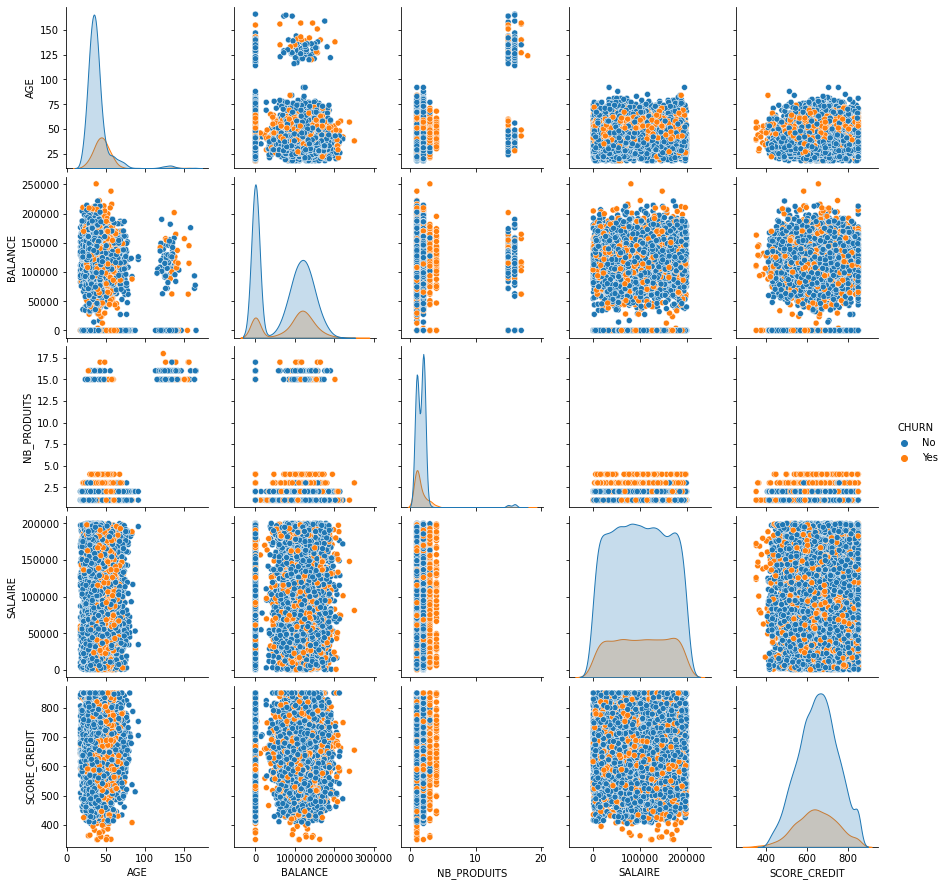

In [4]:
df_pair_plot=df.drop(["NOM", "ID_CLIENT"], axis=1)
sns.pairplot(df_pair_plot, hue="CHURN")

Rows deleted : 559


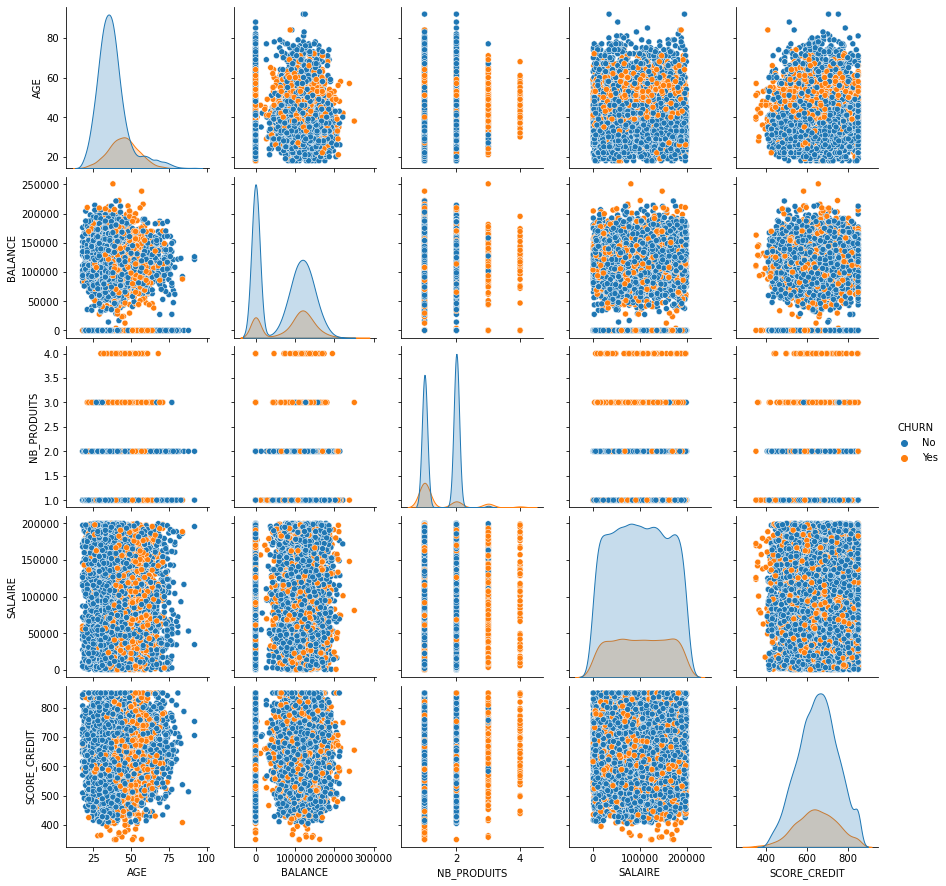

In [5]:
df_pair_plot = df_pair_plot.dropna()
print(f"Rows deleted : {len(df)-len(df_pair_plot)}")
sns.pairplot(df_pair_plot, hue="CHURN")


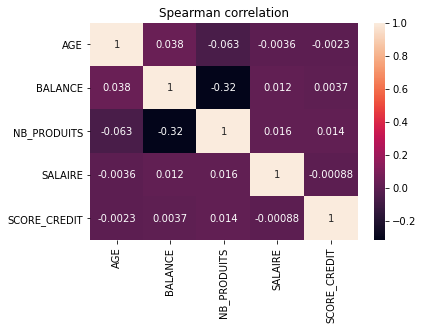

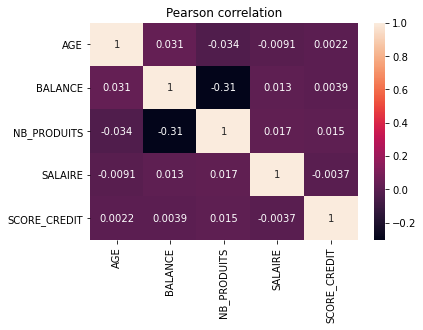

In [6]:
spearman_corr=df_pair_plot.corr(method="spearman")
pearson_corr=df_pair_plot.corr(method="pearson")
sns.heatmap(spearman_corr, annot=True).set_title("Spearman correlation")
plt.show()
sns.heatmap(pearson_corr, annot=True).set_title("Pearson correlation")
plt.show()

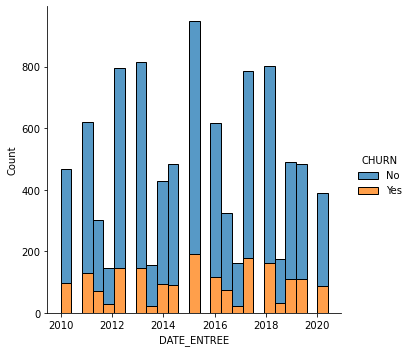

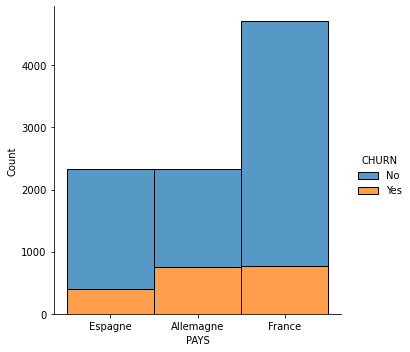

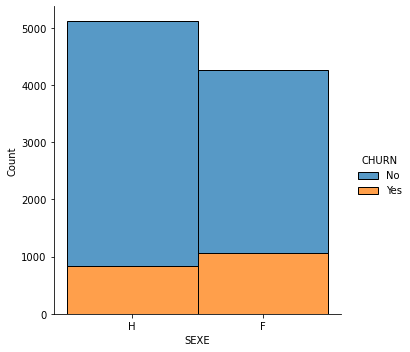

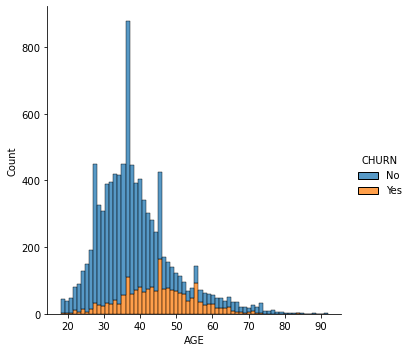

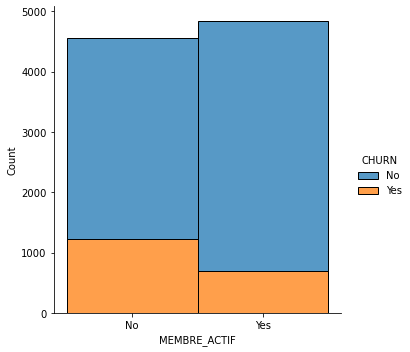

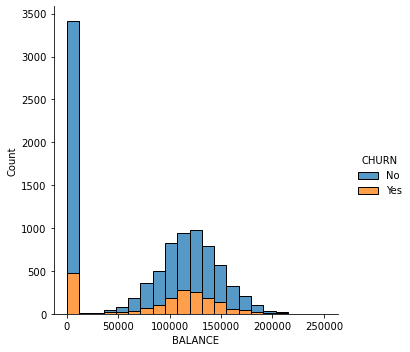

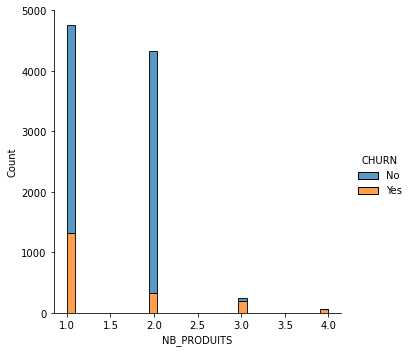

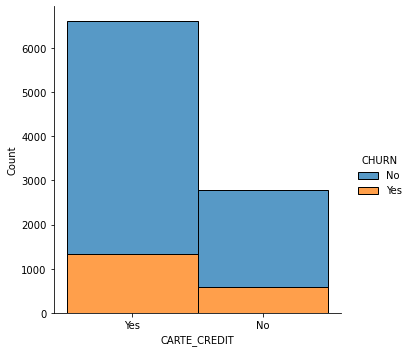

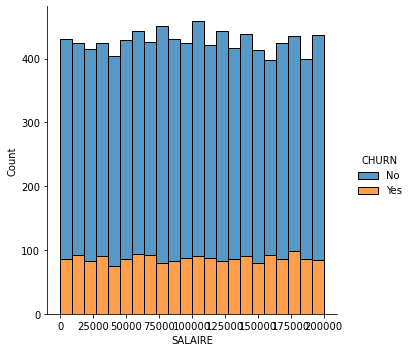

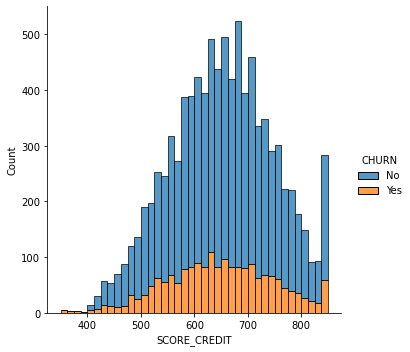

In [7]:
for col in df_pair_plot.columns:
    if col != "CHURN":
        sns.displot(df_pair_plot, x = col, hue="CHURN", multiple="stack")        

Effets visibles de :
- L'age
- Le genre
- Nombre de produits
- Membre Actif/Inactifs
- Pays

## Test Independance of each column with Churn

source: https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

In [8]:
import scipy.stats as stats

for col in df_pair_plot.columns:
    if col != "CHURN":
        crosstab = pd.crosstab(df_pair_plot[col], df_pair_plot["CHURN"])
        _, p_value, *_ = stats.chi2_contingency(crosstab)
        print(f" ------ Independance of {col} ------")
        print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")
        

 ------ Independance of DATE_ENTREE ------
P-Value: 0.4210678352547224 | Rejection of independance: False
 ------ Independance of PAYS ------
P-Value: 2.0157342952056443e-59 | Rejection of independance: True
 ------ Independance of SEXE ------
P-Value: 4.0698544351466556e-24 | Rejection of independance: True
 ------ Independance of AGE ------
P-Value: 1.381828814522706e-269 | Rejection of independance: True
 ------ Independance of MEMBRE_ACTIF ------
P-Value: 1.6379636006684972e-51 | Rejection of independance: True
 ------ Independance of BALANCE ------
P-Value: 9.559736169101624e-15 | Rejection of independance: True
 ------ Independance of NB_PRODUITS ------
P-Value: 5.54198102475653e-303 | Rejection of independance: True
 ------ Independance of CARTE_CREDIT ------
P-Value: 0.39340049812123046 | Rejection of independance: False
 ------ Independance of SALAIRE ------
P-Value: 0.492237489016714 | Rejection of independance: False
 ------ Independance of SCORE_CREDIT ------
P-Value: 0.040

In [9]:
# Test only the effect of year
crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.year, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Year ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.month, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Month ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.day, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Day ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")

crosstab = pd.crosstab(df_pair_plot["DATE_ENTREE"].dt.weekday, df_pair_plot["CHURN"])
_, p_value, *_ = stats.chi2_contingency(crosstab)
print(f" ------ Independance of Weekday ------")
print(f"P-Value: {p_value} | Rejection of independance: {p_value<0.05}")


 ------ Independance of Year ------
P-Value: 0.23941352550775385 | Rejection of independance: False
 ------ Independance of Month ------
P-Value: 0.8502279928664216 | Rejection of independance: False
 ------ Independance of Day ------
P-Value: 1.0 | Rejection of independance: False
 ------ Independance of Weekday ------
P-Value: 0.34473561424164695 | Rejection of independance: False


### Select relevant features

In [10]:
df_poc = df[["CHURN","PAYS","SEXE", "AGE", "MEMBRE_ACTIF" , "BALANCE", "NB_PRODUITS", "SCORE_CREDIT"]].dropna()
df_poc

CHURN       PAYS SEXE  AGE MEMBRE_ACTIF    BALANCE  NB_PRODUITS  \
0       No    Espagne    H   40           No       0.00            2   
2      Yes  Allemagne    H   47          Yes  118079.47            4   
3       No  Allemagne    H   36           No  106702.94            2   
4       No     France    H   36          Yes       0.00            2   
5       No    Espagne    F   55          Yes  133676.65            1   
...    ...        ...  ...  ...          ...        ...          ...   
9945    No     France    F   28          Yes  124540.28            1   
9946   Yes     France    F   61           No       0.00            1   
9947    No     France    F   22           No       0.00            1   
9948    No    Espagne    F   31          Yes       0.00            2   
9949    No     France    H   29          Yes  127414.55            1   

      SCORE_CREDIT  
0            677.0  
2            773.0  
3            607.0  
4            628.0  
5            645.0  
...            ...  
9945         755.0  
9946         589.0  
9947         759.0  
9948         689.0  
9949         802.0  

[9391 rows x 8 columns]

### Preprocess data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['AGE', 'BALANCE', 'NB_PRODUITS', "SCORE_CREDIT", ]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['PAYS', 'SEXE', "MEMBRE_ACTIF"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Train model

In [15]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X = df_poc.drop("CHURN", axis=1)
y = df_poc["CHURN"].replace(to_replace=["Yes", "No"], value=[1,0])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC())])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(f"model accuracy: {round(score*100,1)}%")

model accuracy: 85.1%


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

print(("best SVM from grid search: %.3f"
       % grid_search.score(X_test, y_test)))
    

KeyboardInterrupt: 